<a href="https://colab.research.google.com/github/khalidpark/whitepaper-DeepLearning/blob/main/deep_learning_whitepapaer_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

### Example

In [1]:
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.exposure import rescale_intensity

check = io.imread('https://assets.burberry.com/is/image/Burberryltd/0A0E4068-B7AE-4753-A989-EAD870D22DAA.jpg?$BBY_V2_ML_3x4$&wid=1278&hei=1700')
check_grayscale = rescale_intensity(color.rgb2gray(check))
check_grayscale.shape

(1700, 1278)

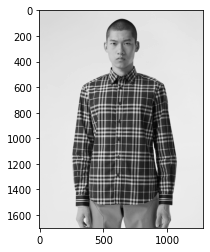

In [2]:
plt.imshow(check_grayscale, cmap="gray");

In [3]:
check_grayscale.shape

(1700, 1278)

In [4]:
import numpy as np
import scipy.ndimage as nd

horizontal_edge_convolution = np.array([[1,1,1,1,],
                                        [0,0,0,0],
                                        [0,0,0,0],
                                        [-1,-1,-1,-1]])

vertical_edge_convolution = np.array([[1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1],
                                     [1, 0, 0, 0, -1]])

check_edges_vert = nd.convolve(check_grayscale, vertical_edge_convolution, mode='constant', cval=0.0)
check_edges_horz = nd.convolve(check_grayscale, horizontal_edge_convolution, mode='reflect')
print(check_edges_vert.shape)
print(check_edges_horz.shape)

(1700, 1278)
(1700, 1278)


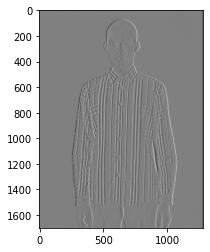

In [5]:
plt.imshow(check_edges_vert, cmap="gray");

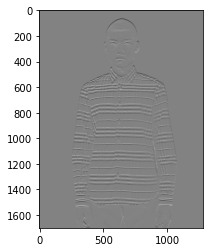

In [6]:
plt.imshow(check_edges_horz, cmap="gray");

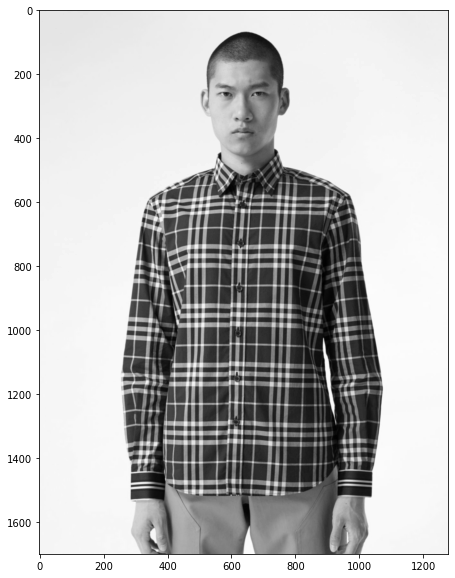

In [7]:
ones_convolution = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
check_ones = nd.convolve(check_grayscale, ones_convolution)
plt.figure(figsize=(30,10))
plt.imshow(check_ones, cmap="gray")

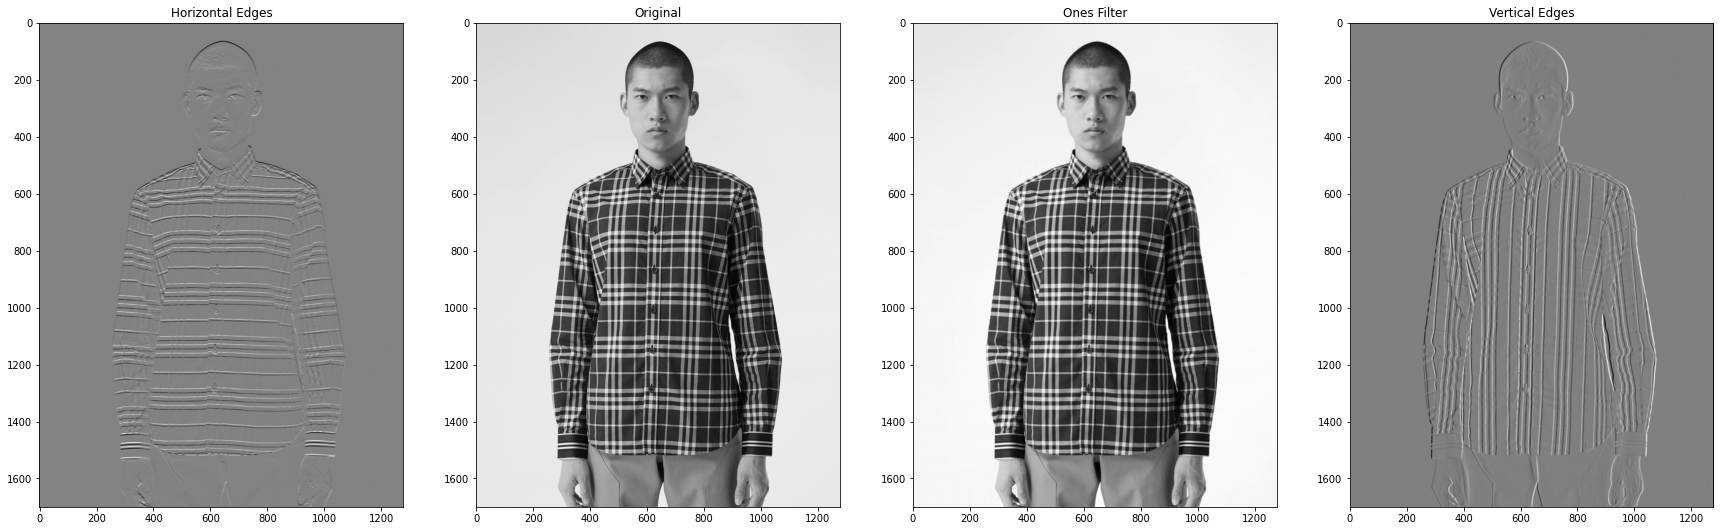

In [8]:
plt.figure(figsize=(30,10))

labels = ["Horizontal Edges", "Original", "Ones Filter", "Vertical Edges"]
images = [check_edges_horz, check_grayscale, check_ones, check_edges_vert]

i = 0
for label, image in zip(labels, images):

    plt.subplot(1,4,i+1)
    plt.grid(False)
    plt.imshow(image, cmap="gray")
    plt.title(label)
    i += 1 

plt.show()

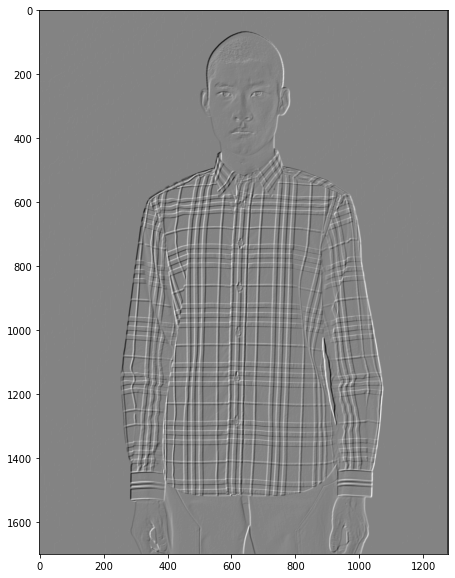

In [9]:
# combine vertical and horizontal edges
combined = check_edges_horz + check_edges_vert
plt.figure(figsize=(30,10))
plt.imshow(combined, cmap="gray")

ImageNet으로 학습이 다 되었을 때 필터의 역할(1st Layer의 Weight 표현)

<img src="https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/etc/note431/CNN3.png" width = 800/>

### Pooling Layer

![](https://lambdaschool-data-science.s3.amazonaws.com/images/Unit4/Sprint2/Module2/Screen+Shot+2020-02-25+at+10.26.13+AM.png)

*Image Credits from __Hands on Machine Learning with Sckit-Learn, Keras & TensorFlow__*

풀링 레이어를 사용하여 피처맵의 차원을 줄입니다. 보통 컨볼루션을 적용한 이후 레이어를 풀링하여 점점 더 작은 피쳐맵를 얻습니다. 이렇게 줄어든 피쳐들을 이용하여 ANN형태의 신경망에 넣어 Classification or regression을 수행하게 됩니다. 

Austen의 사진을 사용하여 매우 간단한 예를 살펴 보겠습니다.

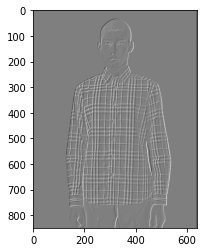

In [10]:
from skimage.measure import block_reduce

reduced = block_reduce(combined, (2,2), np.max)
plt.imshow(reduced, cmap="gray");

In [11]:
reduced.shape

(850, 639)